In [9]:
import os
import sys
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

sys.path.append(os.getcwd() + "/../")

import bfcnn

In [10]:
# setup environment
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
tf.compat.v1.enable_eager_execution
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [11]:
# setup variables

INPUT_SHAPE = (None, None, 1)

LAPLACIAN_CONFIG = {
    "levels": 3,
    "type": "laplacian",
    "xy_max": (1.0, 1.0),
    "kernel_size": (3, 3)
}

LEVELS = LAPLACIAN_CONFIG["levels"]

IMAGE_PATH = "../images/test/etc/lena.jpg"

In [12]:
# create input for pyramids
x = \
    tf.keras.preprocessing.image.load_img(
        path=IMAGE_PATH,
        color_mode="grayscale",
        target_size=(256, 256))

x = tf.keras.preprocessing.image.img_to_array(x)
x = np.array([x])
x = ((x / 255.0) * 2.0) - 1.0

In [13]:
laplacian_pyramid_model = \
    bfcnn.build_pyramid_model(
        input_dims=INPUT_SHAPE,
        config=LAPLACIAN_CONFIG)

inverse_laplacian_pyramid_model = \
    bfcnn.build_inverse_pyramid_model(
        input_dims=INPUT_SHAPE,
        config=LAPLACIAN_CONFIG)

x_pyramid = laplacian_pyramid_model.predict(x)

x_recovered = inverse_laplacian_pyramid_model.predict(x_pyramid)

x_error = np.abs(x_recovered - x)

2022-04-26 07:51:20,093 INFO pyramid.py:build_laplacian_pyramid_model:409] building laplacian pyramid model with: 3 levels
2022-04-26 07:51:20,098 INFO pyramid.py:kernel_init:91] building gaussian kernel with size: (3, 3, 1, 1)
2022-04-26 07:51:20,118 INFO pyramid.py:kernel_init:91] building gaussian kernel with size: (3, 3, 1, 1)
2022-04-26 07:51:20,132 INFO pyramid.py:build_inverse_laplacian_pyramid_model:472] building inverse laplacian pyramid model with: 3 levels


In [14]:
print(f"error: {np.mean(x_error)}")

error: 4.672031650443387e-10


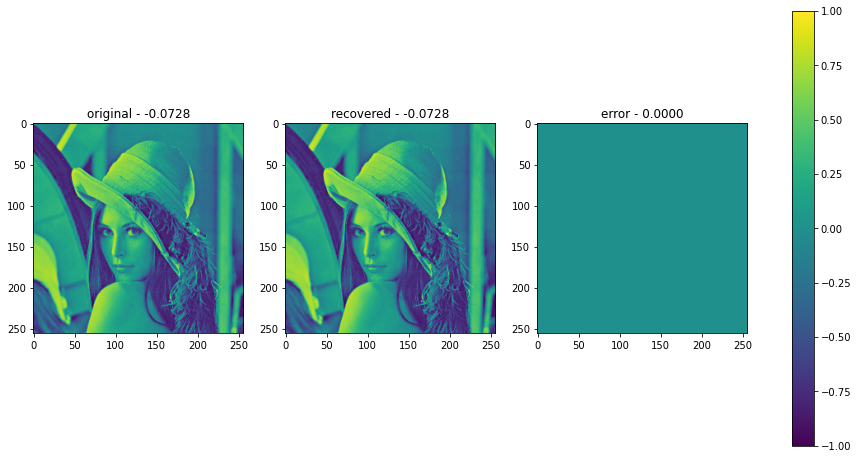

In [15]:
norm = plt.Normalize(-1,+1)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,8))
im = axes[0].imshow(x[0,:,:,0], norm=norm)
axes[0].set_title(f"original - {np.mean(x):0.04f}")
im = axes[1].imshow(x_recovered[0,:,:,0], norm=norm)
axes[1].set_title(f"recovered - {np.mean(x_recovered):0.04f}")
im = axes[2].imshow(x_error[0,:,:,0], norm=norm)
axes[2].set_title(f"error - {np.mean(x_error):0.04f}")
fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()

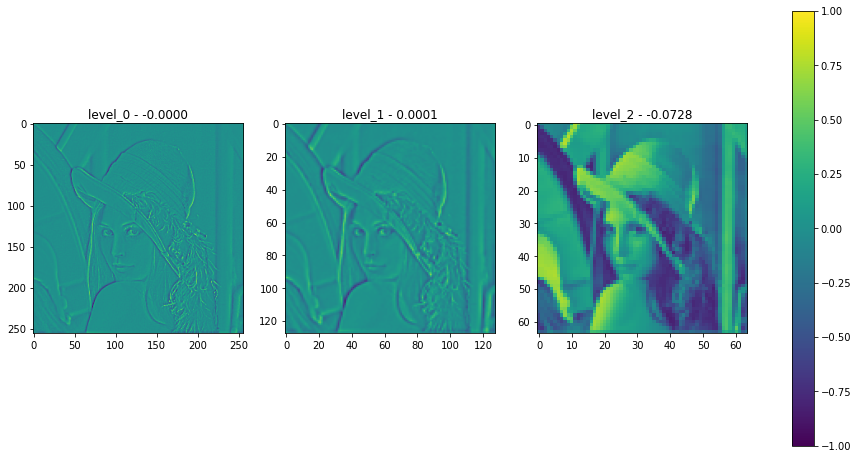

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=LEVELS, figsize=(16,8))
for i in range(LEVELS):
    x_mean_i = np.mean(x_pyramid[i])
    im = axes[i].imshow(x_pyramid[i][0,:,:,0], norm=norm)
    axes[i].set_title(f"level_{i} - {x_mean_i:0.04f}")
fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()

